In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests and time library.
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | ambilobe
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | dali
Processing Record 8 of Set 1 | petatlan
Processing Record 9 of Set 1 | cascais
Processing Record 10 of Set 1 | cerro punta
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | biak
Processing Record 13 of Set 1 | mitsamiouli
Processing Record 14 of Set 1 | ubinskoye
Processing Record 15 of Set 1 | matagami
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | sentyabrskiy
City n

Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | havre-saint-pierre
Processing Record 42 of Set 4 | san vicente
Processing Record 43 of Set 4 | bluff
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | gravdal
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | ambon
Processing Record 1 of Set 5 | vrangel
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | olga
Processing Record 7 of Set 5 | hervey bay
Processing Record 8 of Set 5 | kamenka
Processing Record 9 of Set 5 | requena
Processing Record 10 of Set 5 | la ronge
Processing Record 11 of Set 5 | lagos
Processing Record 12 of Set 5 | ballina
Processing Record 13 of Set 5 | mazagao
Processing Record 14 of Set

Processing Record 30 of Set 8 | baykit
Processing Record 31 of Set 8 | saint george
Processing Record 32 of Set 8 | beidao
Processing Record 33 of Set 8 | castelbuono
Processing Record 34 of Set 8 | oktyabrskoye
Processing Record 35 of Set 8 | bolshaya sosnova
Processing Record 36 of Set 8 | morant bay
Processing Record 37 of Set 8 | broken hill
Processing Record 38 of Set 8 | imbituba
Processing Record 39 of Set 8 | dzhebariki-khaya
Processing Record 40 of Set 8 | yining
Processing Record 41 of Set 8 | miass
Processing Record 42 of Set 8 | santa maria da vitoria
Processing Record 43 of Set 8 | praia da vitoria
Processing Record 44 of Set 8 | sao joao da barra
Processing Record 45 of Set 8 | mecca
Processing Record 46 of Set 8 | dwarka
Processing Record 47 of Set 8 | coihaique
Processing Record 48 of Set 8 | thinadhoo
Processing Record 49 of Set 8 | grand gaube
Processing Record 50 of Set 8 | richards bay
Processing Record 1 of Set 9 | santa catalina
Processing Record 2 of Set 9 | pert

Processing Record 18 of Set 12 | aksarka
Processing Record 19 of Set 12 | bertinoro
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | manzil jamil
City not found. Skipping...
Processing Record 23 of Set 12 | warner robins
Processing Record 24 of Set 12 | nuuk
Processing Record 25 of Set 12 | mugur-aksy
Processing Record 26 of Set 12 | cam ranh
Processing Record 27 of Set 12 | spassk-ryazanskiy
Processing Record 28 of Set 12 | yarada
Processing Record 29 of Set 12 | itarema
Processing Record 30 of Set 12 | pandharpur
Processing Record 31 of Set 12 | nabire
Processing Record 32 of Set 12 | matehuala
Processing Record 33 of Set 12 | puerto quijarro
Processing Record 34 of Set 12 | meyungs
City not found. Skipping...
Processing Record 35 of Set 12 | carlos antonio lopez
Processing Record 36 of Set 12 | samusu
City not found. Skipping...
Processing Record 37 of Set 12 | otradnaya
Processing Record 38 of Set 12 | ile

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.63,75,100,11.27,MV,2022-07-12 20:37:20
1,Sitka,57.0531,-135.3300,55.29,76,75,4.61,US,2022-07-12 20:37:20
2,Ambilobe,-13.2000,49.0500,68.59,76,5,4.12,MG,2022-07-12 20:37:21
3,Port Elizabeth,-33.9180,25.5701,50.29,93,0,1.14,ZA,2022-07-12 20:37:21
4,Atuona,-9.8000,-139.0333,77.81,77,46,18.28,PF,2022-07-12 20:37:21
5,Dunedin,-45.8742,170.5036,46.76,95,100,15.90,NZ,2022-07-12 20:37:22
6,Dali,25.7000,100.1833,63.57,92,3,3.42,CN,2022-07-12 20:34:05
7,Petatlan,17.5167,-101.2667,91.20,58,46,9.17,MX,2022-07-12 20:37:22
8,Cascais,38.6979,-9.4215,87.15,40,0,9.22,PT,2022-07-12 20:37:22
9,Cerro Punta,8.8500,-82.5667,56.70,97,94,2.68,PA,2022-07-12 20:37:23


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-07-12 20:37:20,-0.6000,73.0833,82.63,75,100,11.27
1,Sitka,US,2022-07-12 20:37:20,57.0531,-135.3300,55.29,76,75,4.61
2,Ambilobe,MG,2022-07-12 20:37:21,-13.2000,49.0500,68.59,76,5,4.12
3,Port Elizabeth,ZA,2022-07-12 20:37:21,-33.9180,25.5701,50.29,93,0,1.14
4,Atuona,PF,2022-07-12 20:37:21,-9.8000,-139.0333,77.81,77,46,18.28


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657663836.0329158

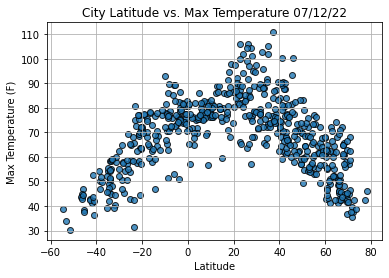

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

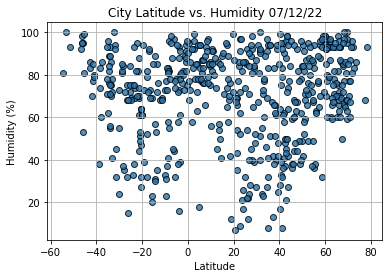

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

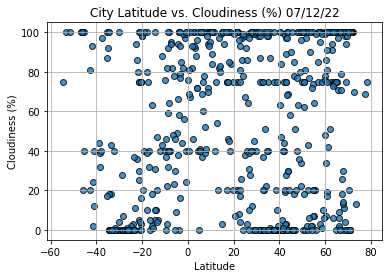

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

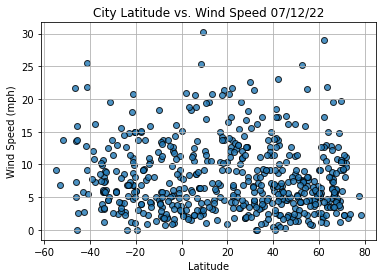

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()